In [67]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load the MNIST dataset from Keras

In [68]:
# keras.datasets.mnist.load_data()  # -> data and test data


(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


In [69]:
print("Training samples: ", len(X_train))
print("Test samples: ", len(X_test))

print("Shape of individual images: ", X_train[0].shape)

Training samples:  60000
Test samples:  10000
Shape of individual images:  (28, 28)


In [70]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

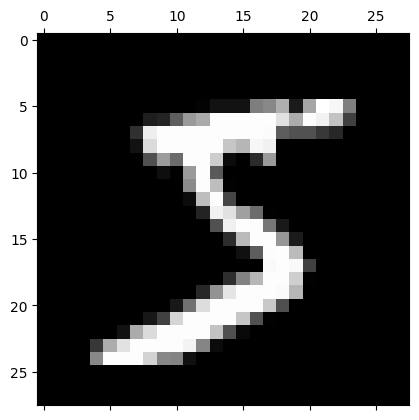

In [71]:
plt.matshow(X_train[0], cmap='gray')

In [72]:
y_train[0]

np.uint8(5)

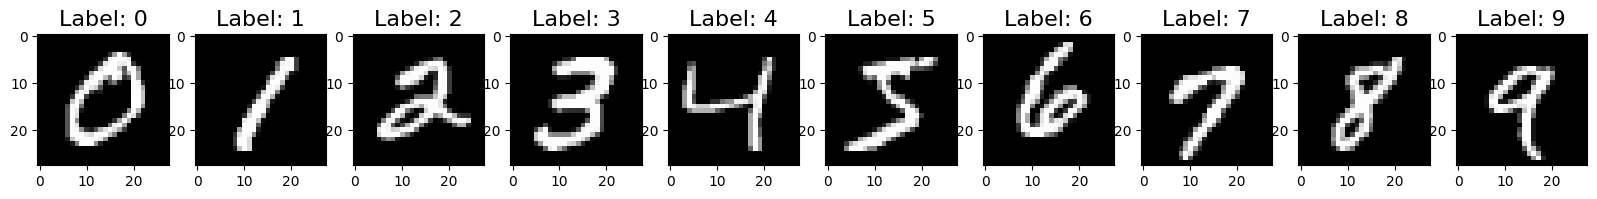

In [73]:
num_classes = 10
_, ax = plt.subplots(1, num_classes, figsize=(20, 20))
for i in range(num_classes):
    sample = X_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'Label: {i}', fontsize=16)

In [74]:
X_train.shape

(60000, 28, 28)

## Scaling Pixel Values

We scale the values to the range [0, 1] for several reasons. Neural networks typically perform better with input data that is on a smaller scale. This helps in speeding up the process since smaller values make the weight adjusments in the optimization algorithm less extreme. It also helps in preventing the model from getting stuck in local minima during training. Furthermore, scaling ensures that all input features (pixel values in this case) contribute equally to the distance computations in the learning process, thus avoiding bias towards features with larger scales.

In [75]:
X_train = X_train / 255
X_test = X_test / 255

In [76]:
for r in X_train[2]:
    for c in r:
        if c > 0:
            print(c)

0.2627450980392157
0.9098039215686274
0.15294117647058825
0.24313725490196078
0.3176470588235294
0.47058823529411764
0.7058823529411765
0.15294117647058825
0.49411764705882355
0.6392156862745098
0.00784313725490196
0.6
0.8235294117647058
0.1568627450980392
0.8627450980392157
0.6392156862745098
0.10588235294117647
0.996078431372549
0.6352941176470588
0.8705882352941177
0.6392156862745098
0.7176470588235294
0.996078431372549
0.49019607843137253
0.1803921568627451
0.9607843137254902
0.6392156862745098
0.7764705882352941
0.996078431372549
0.2196078431372549
0.47058823529411764
0.996078431372549
0.6392156862745098
0.09019607843137255
0.9058823529411765
0.996078431372549
0.11372549019607843
0.6235294117647059
0.996078431372549
0.47058823529411764
0.6392156862745098
0.996078431372549
0.8470588235294118
0.06274509803921569
0.6235294117647059
0.996078431372549
0.2627450980392157
0.054901960784313725
0.33725490196078434
0.6980392156862745
0.9725490196078431
0.996078431372549
0.3568627450980392
0

## Flattening Images to 1D Arrays

In many machine learning models, including simple neural networks, the input data needs to be a flat vector of features. By converting the 2D image matrices into 1D arrays, we transform the data into a format that the neural netwok can work with. This is because the underlying algorithms typically expect a single list of features for each input sample, and each pixel value in the image is treated as a separate feature. This step is essential for the model to process the input image data correctly.

In [77]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [78]:
print(X_train.shape)
print(X_train_flattened.shape)

(60000, 28, 28)
(60000, 784)


## Create an initial Neural Network using Keras

We will initially use a simple network that only has an input layer and an output layer. The input layer will have 784 neurons(28x28 pixels in each image) and the output layer will have 10 neurons as we want to predict a digit, 0-9

In [79]:
model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape=(784,), activation="softmax")
    ]
)

model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

/opt/conda/envs/ml/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - accuracy: 0.8146 - loss: 0.7199
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 388us/step - accuracy: 0.9145 - loss: 0.3086
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 362us/step - accuracy: 0.9203 - loss: 0.2835
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 361us/step - accuracy: 0.9224 - loss: 0.2740
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 362us/step - accuracy: 0.9253 - loss: 0.2684


Lab 2025-08-14

# Prediction Generation:
How can you generate predictions from a trained neural network model using a test dataset? What function or method would you use?

# Accessing Prediction Details:
How would you access the prediction details for the second image in the test dataset? Which index would you use to retrieve this information from the predictions array?

# Finding the Predicted Class:
How can you determine the predicted class from the output of a neural network? What function would you use to find the index of the highest probability?

# Visualizing Test Data:
Which function would you use to visualize a specific test image, and what parameters might you need to provide to display it in grayscale?

# Comparing with Actual Labels:
How would you retrieve the actual label for the second image in the test dataset? Which index should you use to access this information?

# Converting Predictions to Class Labels:
How can you convert a list of prediction probabilities into class labels for each test image? What Python technique or method would help you iterate over the predictions and extract the labels?

# Examining Initial Predictions:
How would you access the first five predicted class labels from your converted predictions? Which part of the list would you slice to get this subset?

2


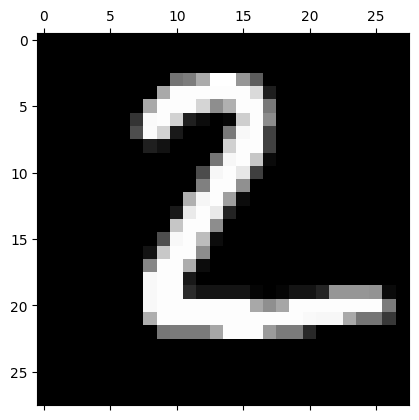

In [80]:
plt.matshow(X_test[1], cmap='gray')

print(y_test[1])

In [81]:
model.predict(X_test_flattened[1].reshape(1, -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[7.8580517e-04, 5.3967769e-06, 9.8244113e-01, 4.4437431e-04,
        6.0971817e-13, 3.5793418e-03, 1.2557215e-02, 7.9655555e-16,
        1.8679904e-04, 2.8912298e-12]], dtype=float32)

In [82]:
print(X_test_flattened.shape)
prediction = model.predict(X_test_flattened)
prediction


(10000, 784)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step


array([[7.7600789e-06, 9.2550717e-11, 1.1757813e-05, ..., 9.9275887e-01,
        3.2136821e-05, 4.4409593e-04],
       [7.8580563e-04, 5.3967724e-06, 9.8244119e-01, ..., 7.9655561e-16,
        1.8679905e-04, 2.8912300e-12],
       [2.8199779e-06, 9.7570872e-01, 1.3079574e-02, ..., 1.1383807e-03,
        4.6482868e-03, 2.8862018e-04],
       ...,
       [1.0149347e-08, 1.9365206e-08, 3.0189510e-06, ..., 1.2375220e-03,
        3.9365478e-03, 1.2230549e-02],
       [6.1865313e-07, 1.3636386e-06, 7.4545568e-07, ..., 2.7565687e-07,
        1.1180568e-02, 5.2390169e-07],
       [1.2787015e-06, 8.2165984e-14, 2.4499894e-05, ..., 2.8397783e-12,
        3.6300754e-08, 2.3736174e-10]], dtype=float32)

In [83]:
def getNumber(predict):
    return np.argmax(predict)

num = []
for i in prediction:
    num.append(getNumber(i))
num

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(1),
 np.int64(5),
 np.int64(9),
 np.int64(7),
 np.int64(3),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(6),
 np.int64(5),
 np.int64(4),
 np.int64(0),
 np.int64(7),
 np.int64(4),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(6),
 np.int64(7),
 np.int64(2),
 np.int64(7),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(7),
 np.int64(4),
 np.int64(2),
 np.int64(3),
 np.int64(5),
 np.int64(1),
 np.int64(2),
 np.int64(4),
 np.int64(4),
 np.int64(6),
 np.int64(3),
 np.int64(5),
 np.int64(5),
 np.int64(6),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(9),
 np.int64(5),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(2),
 np.int64(7),
 np.int64(4),
 np.int64(2),
 np.int64(4),
 np.int64(3),
 np.int64(0),
 np.int64(7),
 np.in

In [87]:
errorIndex = []

correct_counter = 0
for i in range(len(num)):
    if(y_test[i] == num[i]):
        correct_counter += 1
    else:
        errorIndex.append(i)

print(len(errorIndex))
print(correct_counter / len(num))
print(errorIndex)

748
0.9252
[8, 33, 63, 66, 124, 149, 193, 195, 211, 217, 233, 241, 247, 259, 290, 300, 307, 318, 320, 321, 340, 352, 359, 362, 381, 406, 412, 435, 444, 445, 448, 468, 478, 479, 502, 507, 511, 531, 536, 543, 547, 551, 565, 569, 578, 582, 583, 591, 613, 619, 627, 628, 629, 659, 684, 691, 707, 717, 720, 728, 738, 740, 741, 760, 791, 829, 839, 844, 857, 877, 881, 898, 924, 938, 939, 947, 950, 951, 956, 965, 975, 982, 999, 1003, 1012, 1014, 1028, 1032, 1039, 1044, 1062, 1068, 1082, 1096, 1101, 1107, 1112, 1114, 1128, 1181, 1191, 1192, 1194, 1198, 1202, 1204, 1206, 1208, 1217, 1226, 1232, 1233, 1234, 1242, 1247, 1256, 1260, 1283, 1289, 1299, 1310, 1319, 1325, 1326, 1328, 1337, 1339, 1347, 1364, 1378, 1393, 1402, 1410, 1413, 1429, 1433, 1435, 1440, 1444, 1466, 1467, 1494, 1500, 1514, 1522, 1525, 1527, 1530, 1549, 1553, 1559, 1569, 1581, 1587, 1609, 1634, 1640, 1671, 1678, 1681, 1686, 1695, 1696, 1709, 1717, 1718, 1722, 1732, 1751, 1754, 1772, 1773, 1774, 1790, 1800, 1813, 1828, 1839, 1850, 18

6
4


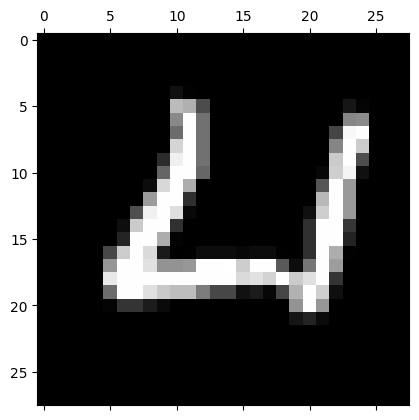

In [ ]:
print(num[33])
print(y_test[33])
plt.matshow(X_test[33], cmap='gray')


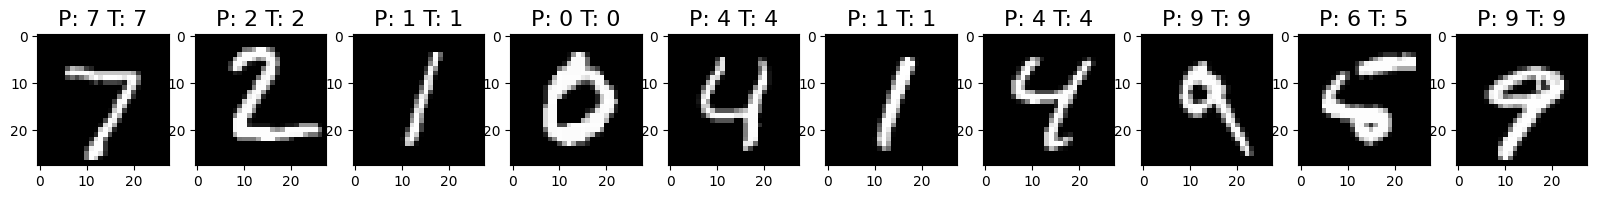

In [ ]:
num_classes = 10
_, ax = plt.subplots(1, num_classes, figsize=(20, 20))
for i in range(num_classes):
    sample = X_test[i]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'P: {num[i]} T: {y_test[i]}', fontsize=16)